In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Install YOLOv8 (Ultralytics)
!pip install ultralytics


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink

In [ ]:
import os
import shutil
import random
import glob

# Define source directories from your mounted Google Drive
src_images = '/content/drive/MyDrive/YOLOv8_Dataset/images'
src_labels = '/content/drive/MyDrive/YOLOv8_Dataset/labels'

# Define destination root in Colab local storage for faster access
dest_root = '/content/YOLOv8_Dataset_split'
dest_images_train = os.path.join(dest_root, 'images', 'train')
dest_images_test = os.path.join(dest_root, 'images', 'test')
dest_labels_train = os.path.join(dest_root, 'labels', 'train')
dest_labels_test = os.path.join(dest_root, 'labels', 'test')

# Create destination directories if they do not exist
os.makedirs(dest_images_train, exist_ok=True)
os.makedirs(dest_images_test, exist_ok=True)
os.makedirs(dest_labels_train, exist_ok=True)
os.makedirs(dest_labels_test, exist_ok=True)

# List all image files (adjust pattern if needed, e.g., *.png)
all_images = glob.glob(os.path.join(src_images, '*.jpg'))
random.shuffle(all_images)

# Split ratio (80% train, 20% test)
split_ratio = 0.8
train_count = int(len(all_images) * split_ratio)
train_images = all_images[:train_count]
test_images = all_images[train_count:]

# Function to copy images and corresponding labels
def copy_files(image_list, dest_img_dir, dest_label_dir):
    for image_path in image_list:
        # Copy image
        shutil.copy(image_path, dest_img_dir)

        # Determine corresponding label file name
        base_name = os.path.basename(image_path)
        label_name = os.path.splitext(base_name)[0] + '.txt'
        src_label_file = os.path.join(src_labels, label_name)
        if os.path.exists(src_label_file):
            shutil.copy(src_label_file, dest_label_dir)

# Copy training files
copy_files(train_images, dest_images_train, dest_labels_train)
# Copy testing/validation files
copy_files(test_images, dest_images_test, dest_labels_test)

print("Dataset split and copy complete!")


Dataset split and copy complete!


In [ ]:
dataset_yaml = f"""
# Dataset configuration for YOLOv8
path: {dest_root}  # absolute path to the dataset root in Colab local storage
train: images/train
val: images/test

# Class names and indexing (ensure these indices match your annotation files)
names:
  0: Eye
  1: Tag
  2: Face
  3: Muzzle
"""

# Write to file
with open(os.path.join(dest_root, 'dataset.yaml'), 'w') as f:
    f.write(dataset_yaml)

print("dataset.yaml created at:", os.path.join(dest_root, 'dataset.yaml'))


dataset.yaml created at: /content/YOLOv8_Dataset_split/dataset.yaml


In [ ]:
from ultralytics import YOLO

# Choose your model size: yolov8n.pt, yolov8s.pt, yolov8m.pt, etc.
model = YOLO('yolov8n.pt')

# Train the model
results = model.train(
    data=os.path.join(dest_root, 'dataset.yaml'),  # path to dataset.yaml
    epochs=50,     # adjust epochs as needed
    imgsz=640      # image size (can adjust based on your GPU capacity)
)

# Optionally, view training results (loss curves, mAP, etc.)
print(results)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 166MB/s]


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/YOLOv8_Dataset_split/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 39.9MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 142MB/s]


AMP: checks passed ✅


train: Scanning /content/YOLOv8_Dataset_split/labels/train... 57 images, 0 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:17<00:00,  3.21it/s]

train: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/train/sheep-No-102_IMG20231117163657.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/train/sheep-No-102_IMG20231117163711.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/train/sheep-No-102_IMG20231117163713.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/train/sheep-No-102_IMG20231117163743.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/train/sheep-No-102_IMG20231117163744.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/train/sheep-No-102_IMG20231117163749.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/train/sheep-No-102_IMG20231117163750.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/train/sheep-No-103_IMG20231114154925.jpg: 

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/YOLOv8_Dataset_split/labels/test... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:12<00:00,  1.20it/s]

val: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/test/sheep-No-102_IMG20231117163656.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/test/sheep-No-102_IMG20231117163707.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/test/sheep-No-103_IMG20231114154919.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/test/sheep-No-103_IMG20231117160703.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/test/sheep-No-103_IMG20231117160705.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/test/sheep-No-103_IMG20231117160740.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/test/sheep-No-103_IMG20231117160745.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YOLOv8_Dataset_split/images/test/sheep-No-103_IMG20231117160854.jpg: corrupt JPEG restored an

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.08G      1.621      3.595      1.723         48        640: 100%|██████████| 4/4 [00:06<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]

                   all         15         46    0.00325      0.309     0.0787     0.0362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.1G      1.588      3.599      1.714         45        640: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         15         46    0.00457       0.34      0.167     0.0789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.11G      1.494       3.36      1.659         41        640: 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         15         46      0.012      0.309      0.244       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.13G      1.479      2.873      1.685         52        640: 100%|██████████| 4/4 [00:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         15         46     0.0174      0.403      0.239      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.15G      1.484      2.596      1.626         48        640: 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         15         46     0.0293      0.431      0.241      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.17G      1.406      2.288       1.57         35        640: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         15         46     0.0358      0.411      0.248      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.19G      1.387      1.885      1.534         51        640: 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         15         46     0.0732      0.384      0.249      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.2G      1.383      1.812      1.523         46        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         15         46     0.0374      0.458      0.264      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.22G      1.348      1.674      1.507         51        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         15         46          1      0.128       0.36      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.24G      1.302      1.668      1.478         56        640: 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.74s/it]

                   all         15         46          1      0.165      0.301      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.25G      1.204       1.57      1.377         50        640: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         15         46      0.981      0.239      0.485      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.27G      1.249      1.507      1.443         43        640: 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]

                   all         15         46      0.996      0.231      0.617      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.29G      1.285      1.407      1.403         52        640: 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         15         46      0.966      0.231      0.583      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.31G      1.219      1.351      1.398         48        640: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]

                   all         15         46      0.996      0.231      0.628      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.33G      1.201      1.359      1.369         47        640: 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         15         46       0.95       0.25      0.702      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.34G       1.17      1.335      1.399         39        640: 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.63s/it]

                   all         15         46      0.955       0.25      0.703      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.37G      1.203      1.329      1.389         56        640: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         15         46      0.983      0.323      0.723       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.38G      1.167       1.25      1.353         48        640: 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]

                   all         15         46       0.97      0.342      0.794      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.39G      1.239      1.371      1.407         32        640: 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]

                   all         15         46      0.933      0.474      0.801      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.41G      1.155      1.208      1.361         51        640: 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.62s/it]

                   all         15         46      0.914      0.549      0.784      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.43G      1.149      1.199      1.353         48        640: 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all         15         46      0.898      0.509      0.838      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.45G      1.142      1.203      1.348         46        640: 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]

                   all         15         46      0.873      0.503      0.823      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.46G      1.122      1.161      1.331         58        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

                   all         15         46      0.843      0.521      0.846      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.48G      1.113      1.187      1.365         46        640: 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]

                   all         15         46      0.779      0.578      0.857      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       2.5G      1.104      1.077      1.366         54        640: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]

                   all         15         46      0.694      0.613      0.853      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.52G      1.143      1.111      1.346         47        640: 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]

                   all         15         46       0.71      0.677      0.864      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.54G       1.11       1.05      1.285         54        640: 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         15         46      0.686      0.632      0.828      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.55G      1.093      1.033      1.307         43        640: 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]

                   all         15         46      0.743      0.708       0.87      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.57G      1.137      1.032      1.328         49        640: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]

                   all         15         46      0.759      0.744       0.88      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.58G       1.08      1.021      1.295         51        640: 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]

                   all         15         46      0.749      0.748      0.887      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.6G      1.032     0.9529      1.227         52        640: 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]

                   all         15         46      0.756      0.771      0.902      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.62G      1.039     0.9731      1.235         65        640: 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]

                   all         15         46      0.805      0.782      0.913      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.64G      1.061     0.9277      1.234         66        640: 100%|██████████| 4/4 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]

                   all         15         46      0.789      0.792       0.88      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.65G      1.057      0.995        1.3         42        640: 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.68s/it]

                   all         15         46      0.793      0.835      0.879      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.67G      1.021     0.9736      1.287         43        640: 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.00s/it]

                   all         15         46      0.797      0.816      0.873      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.69G      1.006      1.004      1.282         40        640: 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         15         46      0.797      0.794      0.871      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.71G     0.9455       1.01      1.248         29        640: 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]

                   all         15         46      0.755      0.798      0.855      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.72G     0.9091     0.9015      1.181         49        640: 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         15         46      0.722      0.868      0.866      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.74G     0.9139     0.9211      1.231         58        640: 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.45s/it]

                   all         15         46      0.806      0.804      0.912      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.76G      1.023     0.9577      1.269         47        640: 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         15         46      0.816      0.793      0.919      0.514


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.77G     0.8924      1.073      1.222         26        640: 100%|██████████| 4/4 [00:24<00:00,  6.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         15         46      0.823      0.795       0.92      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.79G     0.9223      1.087      1.248         27        640: 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         15         46      0.794      0.886      0.936      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.81G     0.9385      1.051      1.225         28        640: 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         15         46      0.885      0.856       0.94      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.83G     0.9062      1.038      1.191         29        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         15         46      0.896      0.841       0.94       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.84G     0.8886      1.051      1.203         25        640: 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         15         46      0.852      0.855      0.943      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.86G     0.9264      1.039       1.22         27        640: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         15         46      0.838      0.831      0.938      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.88G     0.8762      1.014      1.164         25        640: 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         15         46      0.835      0.838      0.937      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.89G     0.8765     0.9832      1.177         29        640: 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all         15         46      0.746      0.941      0.939      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.91G     0.8874      1.009      1.214         25        640: 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.19s/it]

                   all         15         46      0.853      0.835      0.946      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.93G     0.8106     0.9465      1.124         26        640: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         15         46      0.783      0.906      0.946      0.556



50 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.23s/it]


                   all         15         46      0.783      0.906      0.946      0.558
                   Eye         12         16      0.751          1      0.958      0.425
                   Tag          9          9      0.871       0.75      0.931      0.512
                  Face         13         13      0.795          1      0.995      0.784
                Muzzle          8          8      0.715      0.875      0.901      0.512
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ae8ee298290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,   


image 1/1 /content/YOLOv8_Dataset_split/images/test/sheep-No-104_IMG20231117162546.jpg: 640x480 1 Eye, 1 Tag, 2 Faces, 132.8ms
Speed: 12.8ms preprocess, 132.8ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 480)


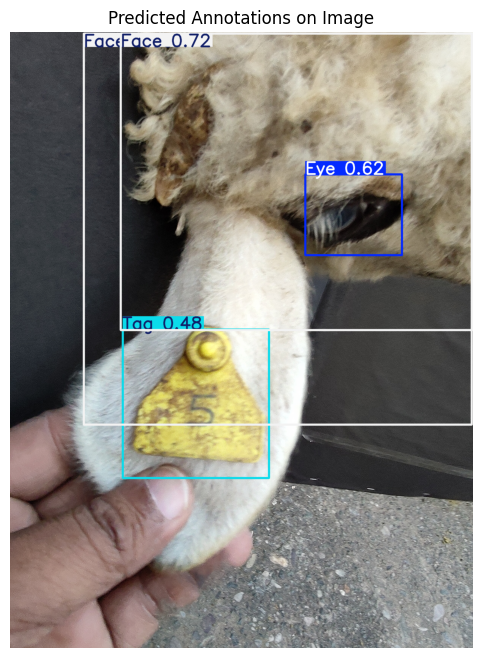

Detected Annotations (bounding boxes, confidence, class IDs):
[[     585.62      7.4698      2445.1      1579.9     0.71863           2]
 [     1561.4      754.32      2072.3      1182.9     0.62093           0]
 [     390.46      8.5827        2441        2081     0.59449           2]
 [     596.79      1576.6      1369.3      2363.9     0.47591           1]]


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Specify the path to an image from your test folder
# Replace 'example.jpg' with the actual image file name
image_path = '/content/YOLOv8_Dataset_split/images/test/sheep-No-104_IMG20231117162546.jpg'

# Run inference on the image using the trained model.
# If you used "model = YOLO('yolov8n.pt')" earlier and trained it,
# the same 'model' object is used here.
results = model(image_path)

# Get the annotated image; YOLOv8's results[0].plot() returns an image array (BGR format)
annotated_img = results[0].plot()

# Convert the image from BGR to RGB (for proper display with matplotlib)
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Display the image with annotations
plt.figure(figsize=(12, 8))
plt.imshow(annotated_img_rgb)
plt.title('Predicted Annotations on Image')
plt.axis('off')
plt.show()

# Print the raw annotation details (bounding boxes, confidence scores, and class indices)
# These details are stored in results[0].boxes, which is a YOLOv8 "Boxes" object.
# You can convert this to a NumPy array for easier reading.
print("Detected Annotations (bounding boxes, confidence, class IDs):")
print(results[0].boxes.data.cpu().numpy())


In [ ]:
# Save the model weights to a custom path
model.save('/content/drive/MyDrive/my_custom_model.pt')


In [ ]:
!cp -r /content/YOLOv8_Dataset_split /content/drive/MyDrive/YOLOv8_SplitDataset
